In [1]:
#from sage.all import *
import numpy as np
import my

In [2]:
def cl_bondy_chvatal(G):
    new = []
    closed = True
    while closed:
        closed = False
        n = G.order()
        nonadj = [(u,v) for u in G.vertices() for v in G.vertices() if u<v and not G.has_edge(u,v)]
        for u, v in nonadj:
            if G.degree(u) + G.degree(v) >= n:
                new.append((u,v))
                G.add_edge(u,v)
                closed = True
    return new, G

In [3]:
def cl_plot(G):
    added, G_ = cl_bondy_chvatal(G)
    edge_colors={}
    for e in G_.edges(labels=False):
        if e in added:
            edge_colors[e] = 'red'
        else:
            edge_colors[e]='blue'
    return G_, edge_colors       

In [4]:
def ex_graph(n, k):
    G = graphs.CompleteGraph(n)
    edges = G.edges(labels=False)
    for i in range(k):
        d = int(np.random.rand()*n)
        G.delete_edge(edges[d])
    return G

In [5]:
def test(n, k):
    G = ex_graph(n, k)
    G_, edge_colors = cl_plot(G)
    draw_g = G_.plot(vertex_size=200, edge_colors=my.invert_mapping(edge_colors))
    draw_g.show()

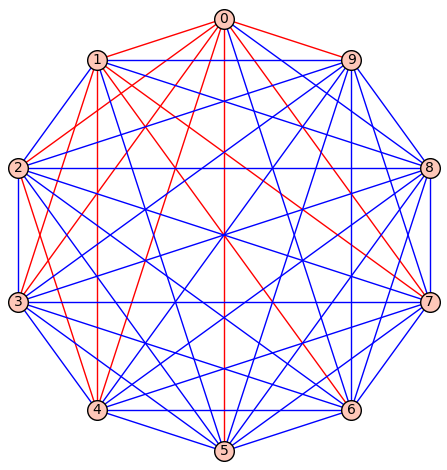

In [10]:
test(10,12)